In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
import cv2

In [2]:
data = pd.read_csv("../kitti360_dataset.csv")
data.head()

,Unnamed: 0,x,y,scene,subset
0,0,/mnt/7BCDA59C6DEFFE3C/KITTI-360/data_2d_raw/20...,/mnt/7BCDA59C6DEFFE3C/KITTI-360/data_2d_semant...,0,train
1,1,/mnt/7BCDA59C6DEFFE3C/KITTI-360/data_2d_raw/20...,/mnt/7BCDA59C6DEFFE3C/KITTI-360/data_2d_semant...,0,train
2,2,/mnt/7BCDA59C6DEFFE3C/KITTI-360/data_2d_raw/20...,/mnt/7BCDA59C6DEFFE3C/KITTI-360/data_2d_semant...,0,train
3,3,/mnt/7BCDA59C6DEFFE3C/KITTI-360/data_2d_raw/20...,/mnt/7BCDA59C6DEFFE3C/KITTI-360/data_2d_semant...,0,train
4,4,/mnt/7BCDA59C6DEFFE3C/KITTI-360/data_2d_raw/20...,/mnt/7BCDA59C6DEFFE3C/KITTI-360/data_2d_semant...,0,train


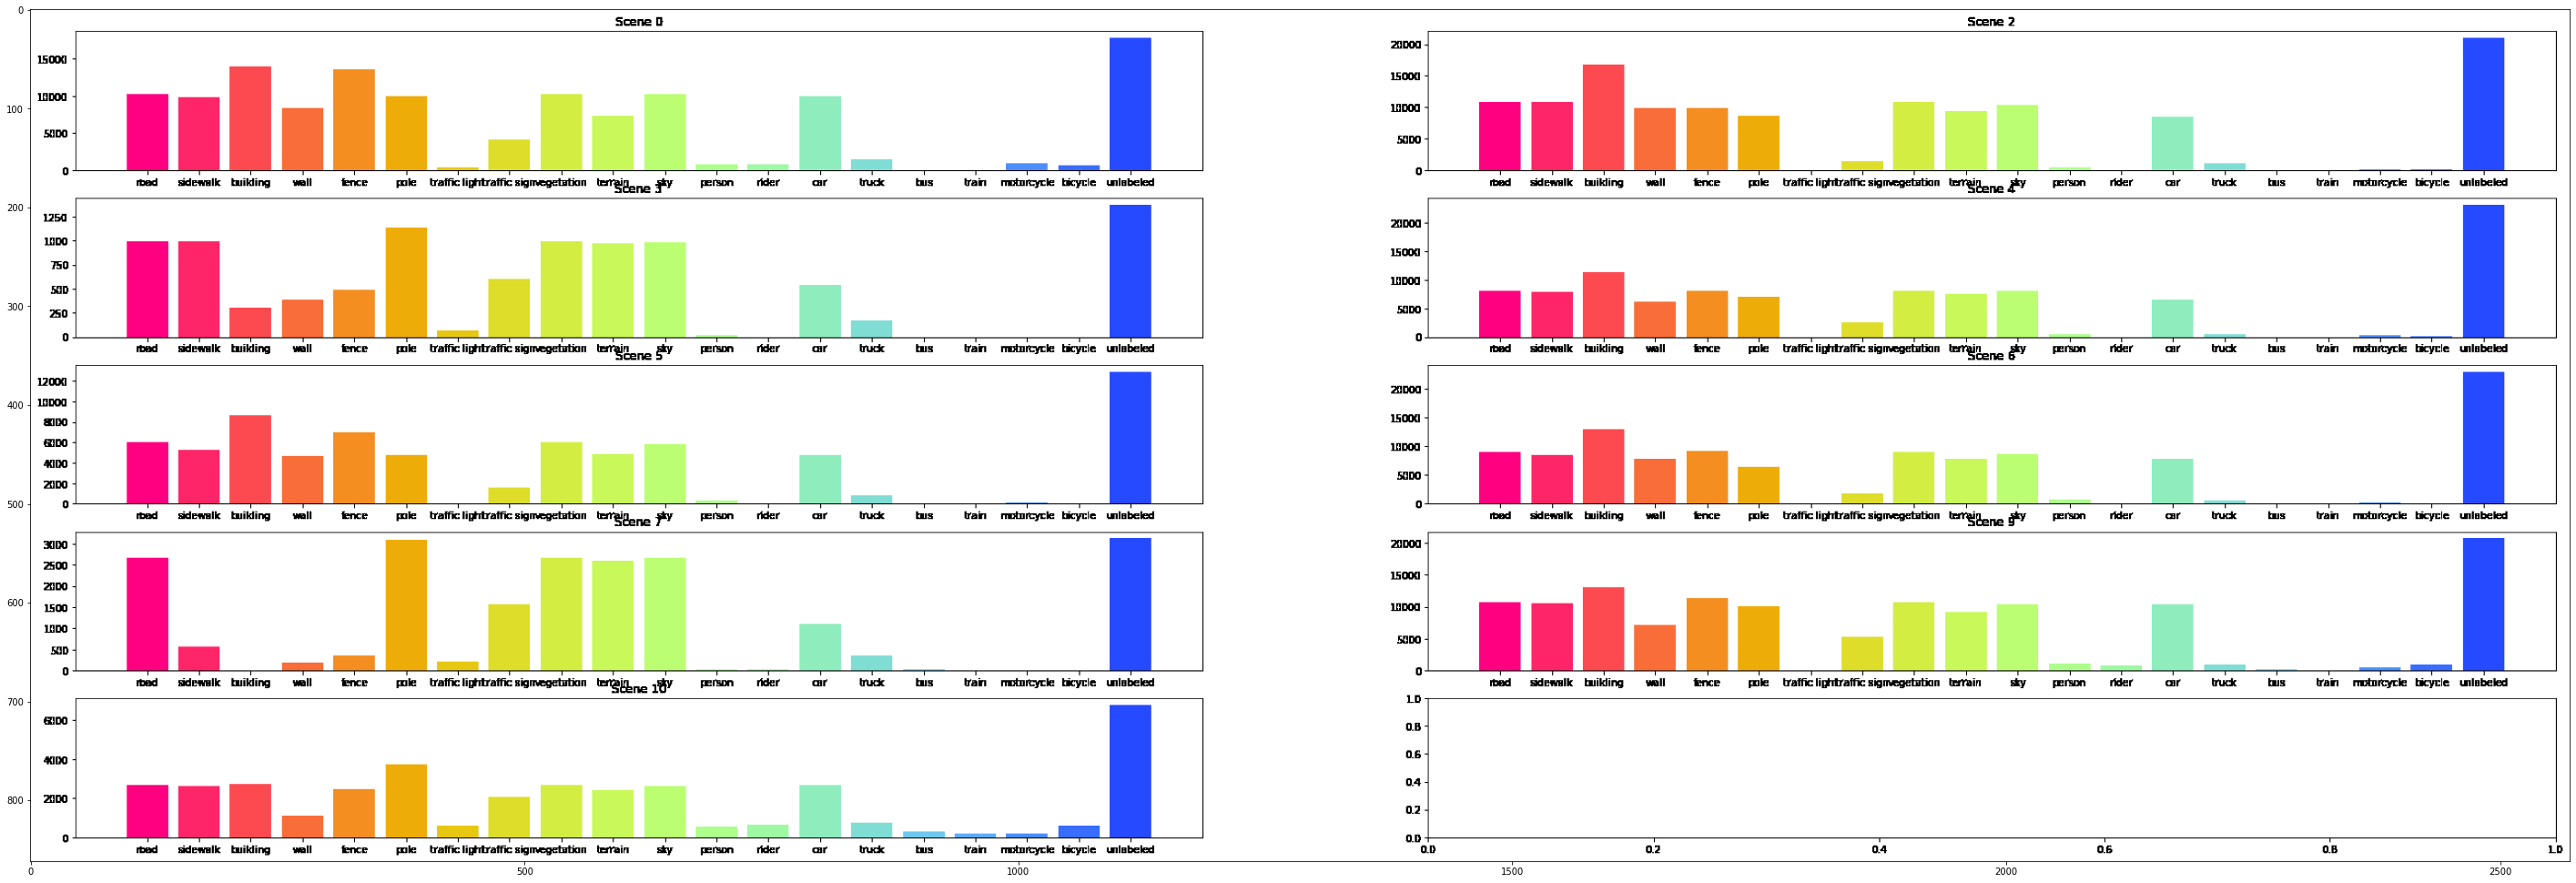

In [9]:
current_proportions = cv2.imread("../proportions_per_scene.jpg")
plt.figure(figsize=(50,50))
plt.imshow(current_proportions)

In [41]:
props = pd.read_csv("../kitti360_multi_hot_encoded.csv")
props = props.drop("Unnamed: 0", axis=1)
props.head()

,image,scene,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,255
0,0000000002.png,/2013_05_28_drive_0007_sync,1,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
1,0000000003.png,/2013_05_28_drive_0007_sync,1,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
2,0000000004.png,/2013_05_28_drive_0003_sync,1,1,1,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,1
3,0000000004.png,/2013_05_28_drive_0007_sync,1,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
4,0000000005.png,/2013_05_28_drive_0007_sync,1,0,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0


In [11]:
from collections import namedtuple

#--------------------------------------------------------------------------------
# Definitions
#--------------------------------------------------------------------------------

# a label and all meta information
Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'kittiId'     , # An integer ID that is associated with this label for KITTI-360
                    # NOT FOR RELEASING

    'trainId'     , # Feel free to modify these IDs as suitable for your method. Then create
                    # ground truth images with train IDs, using the tools provided in the
                    # 'preparation' folder. However, make sure to validate or submit results
                    # to our evaluation server using the regular IDs above!
                    # For trainIds, multiple labels might have the same ID. Then, these labels
                    # are mapped to the same class in the ground truth images. For the inverse
                    # mapping, we use the label that is defined first in the list below.
                    # For example, mapping all void-type classes to the same ID in training,
                    # might make sense for some approaches.
                    # Max value is 255!

    'category'    , # The name of the category that this label belongs to

    'categoryId'  , # The ID of this category. Used to create ground truth images
                    # on category level.

    'hasInstances', # Whether this label distinguishes between single instances or not

    'ignoreInEval', # Whether pixels having this class as ground truth label are ignored
                    # during evaluations or not

    'color'       , # The color of this label
    ] )


#--------------------------------------------------------------------------------
# A list of all labels
#--------------------------------------------------------------------------------

# Please adapt the train IDs as appropriate for your approach.
# Note that you might want to ignore labels with ID 255 during training.
# Further note that the current train IDs are only a suggestion. You can use whatever you like.
# Make sure to provide your results using the original IDs and not the training IDs.
# Note that many IDs are ignored in evaluation and thus you never need to predict these!

labels = [
    #       name                     id    kittiId,    trainId   category            catId     hasInstances   ignoreInEval   color
    Label(  'unlabeled'            ,  0 ,       -1 ,       255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'ego vehicle'          ,  1 ,       -1 ,       255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'rectification border' ,  2 ,       -1 ,       255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'out of roi'           ,  3 ,       -1 ,       255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'static'               ,  4 ,       -1 ,       255 , 'void'            , 0       , False        , True         , (  0,  0,  0) ),
    Label(  'dynamic'              ,  5 ,       -1 ,       255 , 'void'            , 0       , False        , True         , (111, 74,  0) ),
    Label(  'ground'               ,  6 ,       -1 ,       255 , 'void'            , 0       , False        , True         , ( 81,  0, 81) ),
    Label(  'road'                 ,  7 ,        1 ,         0 , 'flat'            , 1       , False        , False        , (128, 64,128) ),
    Label(  'sidewalk'             ,  8 ,        3 ,         1 , 'flat'            , 1       , False        , False        , (244, 35,232) ),
    Label(  'parking'              ,  9 ,        2 ,       255 , 'flat'            , 1       , False        , True         , (250,170,160) ),
    Label(  'rail track'           , 10 ,        10,       255 , 'flat'            , 1       , False        , True         , (230,150,140) ),
    Label(  'building'             , 11 ,        11,         2 , 'construction'    , 2       , True         , False        , ( 70, 70, 70) ),
    Label(  'wall'                 , 12 ,        7 ,         3 , 'construction'    , 2       , False        , False        , (102,102,156) ),
    Label(  'fence'                , 13 ,        8 ,         4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'guard rail'           , 14 ,        30,       255 , 'construction'    , 2       , False        , True         , (180,165,180) ),
    Label(  'bridge'               , 15 ,        31,       255 , 'construction'    , 2       , False        , True         , (150,100,100) ),
    Label(  'tunnel'               , 16 ,        32,       255 , 'construction'    , 2       , False        , True         , (150,120, 90) ),
    Label(  'pole'                 , 17 ,        21,         5 , 'object'          , 3       , True         , False        , (153,153,153) ),
    Label(  'polegroup'            , 18 ,       -1 ,       255 , 'object'          , 3       , False        , True         , (153,153,153) ),
    Label(  'traffic light'        , 19 ,        23,         6 , 'object'          , 3       , True         , False        , (250,170, 30) ),
    Label(  'traffic sign'         , 20 ,        24,         7 , 'object'          , 3       , True         , False        , (220,220,  0) ),
    Label(  'vegetation'           , 21 ,        5 ,         8 , 'nature'          , 4       , False        , False        , (107,142, 35) ),
    Label(  'terrain'              , 22 ,        4 ,         9 , 'nature'          , 4       , False        , False        , (152,251,152) ),
    Label(  'sky'                  , 23 ,        9 ,        10 , 'sky'             , 5       , False        , False        , ( 70,130,180) ),
    Label(  'person'               , 24 ,        19,        11 , 'human'           , 6       , True         , False        , (220, 20, 60) ),
    Label(  'rider'                , 25 ,        20,        12 , 'human'           , 6       , True         , False        , (255,  0,  0) ),
    Label(  'car'                  , 26 ,        13,        13 , 'vehicle'         , 7       , True         , False        , (  0,  0,142) ),
    Label(  'truck'                , 27 ,        14,        14 , 'vehicle'         , 7       , True         , False        , (  0,  0, 70) ),
    Label(  'bus'                  , 28 ,        34,        15 , 'vehicle'         , 7       , True         , False        , (  0, 60,100) ),
    Label(  'caravan'              , 29 ,        16,       255 , 'vehicle'         , 7       , True         , True         , (  0,  0, 90) ),
    Label(  'trailer'              , 30 ,        15,       255 , 'vehicle'         , 7       , True         , True         , (  0,  0,110) ),
    Label(  'train'                , 31 ,        33,        16 , 'vehicle'         , 7       , True         , False        , (  0, 80,100) ),
    Label(  'motorcycle'           , 32 ,        17,        17 , 'vehicle'         , 7       , True         , False        , (  0,  0,230) ),
    Label(  'bicycle'              , 33 ,        18,        18 , 'vehicle'         , 7       , True         , False        , (119, 11, 32) ),
    Label(  'garage'               , 34 ,        12,         2 , 'construction'    , 2       , True         , False        , ( 64,128,128) ),
    Label(  'gate'                 , 35 ,        6 ,         4 , 'construction'    , 2       , False        , False        , (190,153,153) ),
    Label(  'stop'                 , 36 ,        29,       255 , 'construction'    , 2       , True         , True         , (150,120, 90) ),
    Label(  'smallpole'            , 37 ,        22,         5 , 'object'          , 3       , True         , False        , (153,153,153) ),
    Label(  'lamp'                 , 38 ,        25,       255 , 'object'          , 3       , True         , False        , (0,   64, 64) ),
    Label(  'trash bin'            , 39 ,        26,       255 , 'object'          , 3       , True         , False        , (0,  128,192) ),
    Label(  'vending machine'      , 40 ,        27,       255 , 'object'          , 3       , True         , False        , (128, 64,  0) ),
    Label(  'box'                  , 41 ,        28,       255 , 'object'          , 3       , True         , False        , (64,  64,128) ),
    Label(  'unknown construction' , 42 ,        35,       255 , 'void'            , 0       , False        , True         , (102,  0,  0) ),
    Label(  'unknown vehicle'      , 43 ,        36,       255 , 'void'            , 0       , False        , True         , ( 51,  0, 51) ),
    Label(  'unknown object'       , 44 ,        37,       255 , 'void'            , 0       , False        , True         , ( 32, 32, 32) ),
    Label(  'license plate'        , -1 ,        -1,        -1 , 'vehicle'         , 7       , False        , True         , (  0,  0,142) ),
]

kittiId2label   = { label.id : label for label in labels           }
trainId2label   = { label.trainId : label for label in reversed(labels) }

def convert_id_to_training_id(id):
  return kittiId2label[id].trainId

def convert_training_id_to_id(id):
  return trainId2label[id].kittiId

In [23]:
total_per_scene = pd.read_csv("../proportions_fixed.csv")
total_per_scene.head()

,type,scene
0,255,2013_05_28_drive_0004_sync
1,0,2013_05_28_drive_0004_sync
2,1,2013_05_28_drive_0004_sync
3,255,2013_05_28_drive_0004_sync
4,2,2013_05_28_drive_0004_sync


In [13]:
priority_labels = [0,1,6,7,11,12,13,14,15,17,18]
labels = [trainId2label[i].name for i in priority_labels]
labels

['road',
 'sidewalk',
 'traffic light',
 'traffic sign',
 'person',
 'rider',
 'car',
 'truck',
 'bus',
 'motorcycle',
 'bicycle']

In [75]:
def return_count_per_scene(scene, data):
    t = data[data['scene'] == scene].value_counts(sort=False)
    a1 = t.to_dict()
    a2 = []
    ids = priority_labels

    for i in ids:
        k = (i,scene)
        if k in a1.keys():
            a2.append(a1.get(k))
        else:
            a2.append(0)

    return a2

In [19]:
import matplotlib

norm = matplotlib.colors.Normalize(vmin=0, vmax=21)

cmap = matplotlib.cm.get_cmap('rainbow')
colors = [cmap(norm(i)) for i in range(0,len(priority_labels))]
print(colors)

[(0.5, 0.0, 1.0, 1.0), (0.40588235294117647, 0.1473016980546375, 0.997269173385788, 1.0), (0.31176470588235294, 0.2913897468893246, 0.989091608371146, 1.0), (0.21764705882352942, 0.42912060877260894, 0.9755119679804366, 1.0), (0.12352941176470589, 0.5574894393428855, 0.9566044195004408, 1.0), (0.02941176470588236, 0.6736956436465572, 0.9324722294043558, 1.0), (0.0725490196078431, 0.7829276104921027, 0.9005867023006374, 1.0), (0.16666666666666663, 0.8660254037844386, 0.8660254037844387, 1.0), (0.26078431372549016, 0.9302293085467402, 0.8267341748257635, 1.0), (0.3549019607843137, 0.9741386021045101, 0.7829276104921028, 1.0), (0.4490196078431372, 0.9967953249171991, 0.7348449670469758, 1.0)]


Text(0.5, 1.0, 'Scene 10')

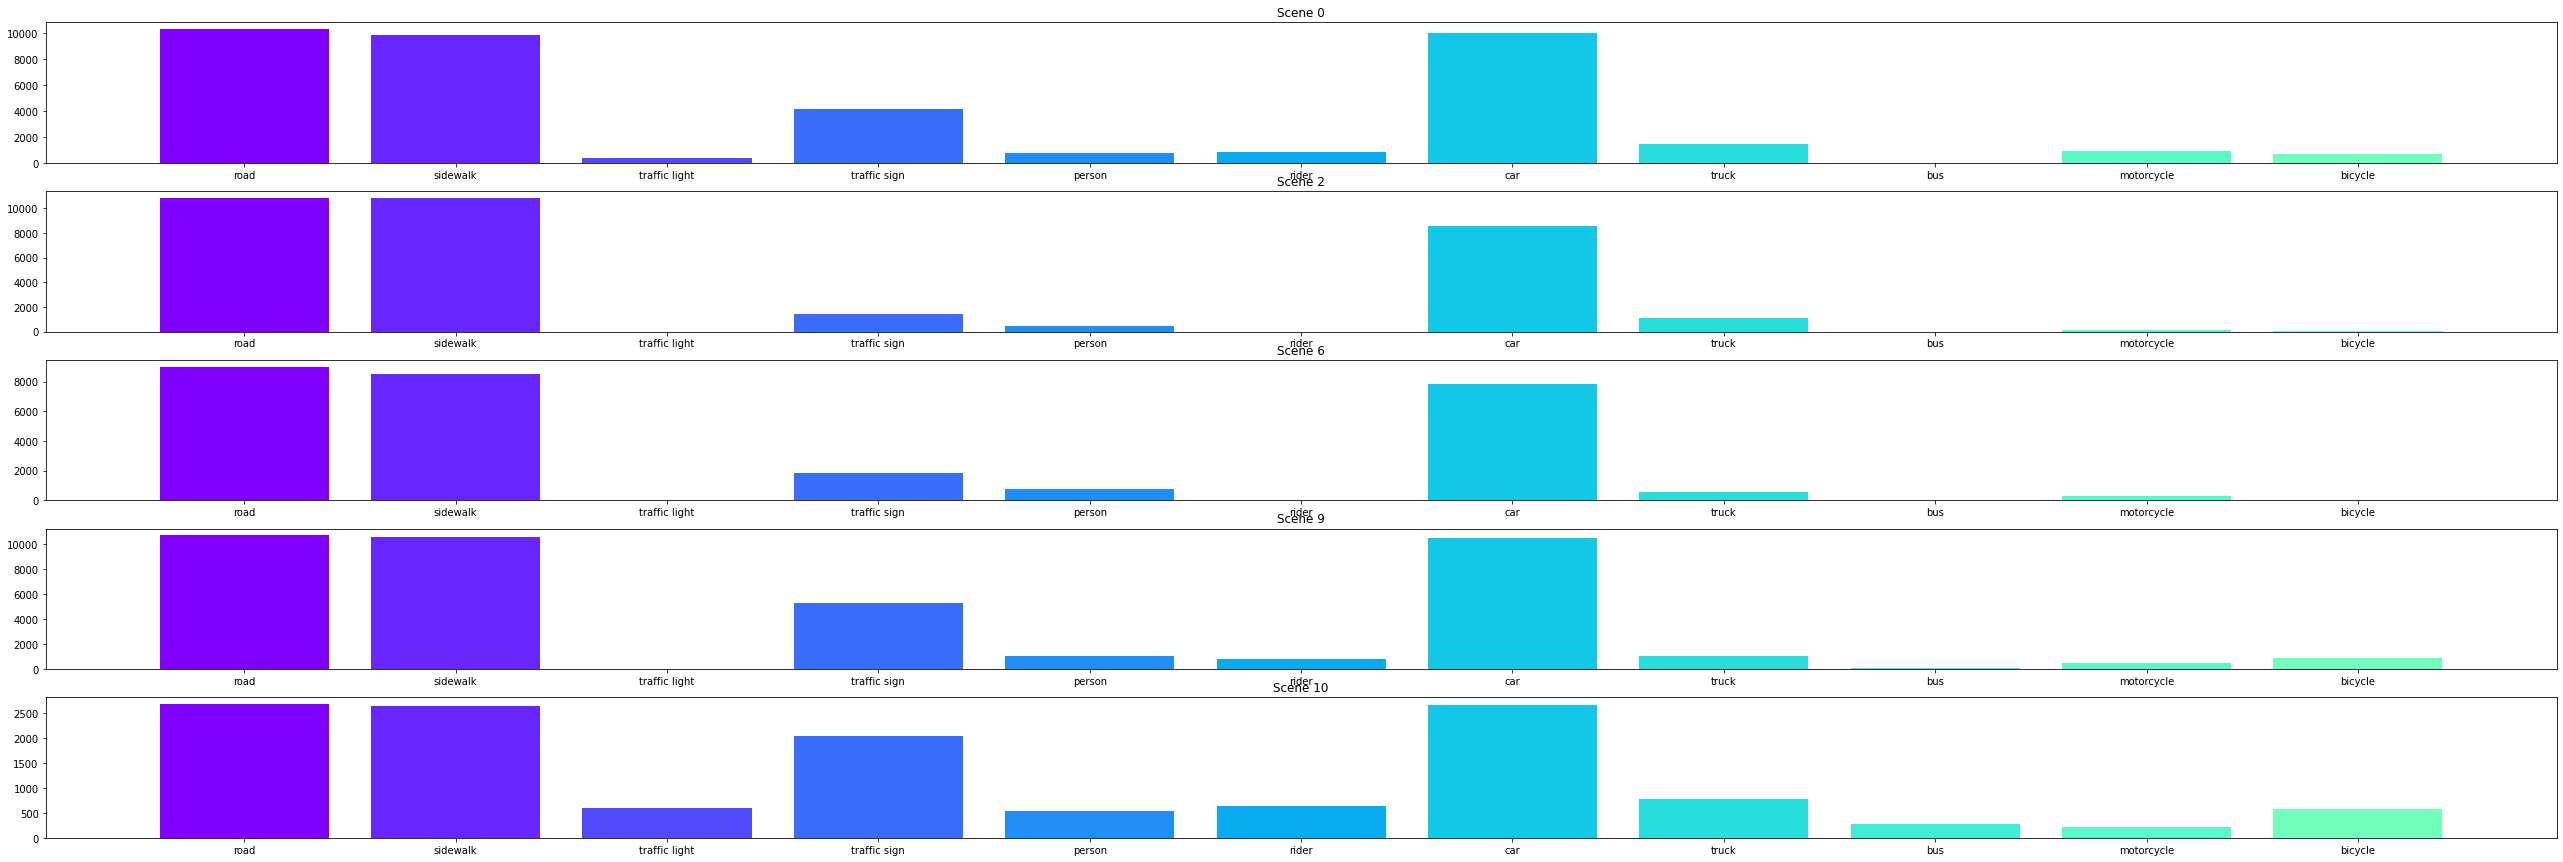

In [31]:
fig, axs = plt.subplots(5, figsize=(45,15))

axs[0].bar(labels, return_count_per_scene('2013_05_28_drive_0000_sync', total_per_scene), color=colors)
axs[0].set_title('Scene 0')
axs[1].bar(labels, return_count_per_scene('2013_05_28_drive_0002_sync', total_per_scene), color=colors)
axs[1].set_title('Scene 2')
axs[2].bar(labels, return_count_per_scene('2013_05_28_drive_0006_sync', total_per_scene), color=colors)
axs[2].set_title('Scene 6')
axs[3].bar(labels, return_count_per_scene('2013_05_28_drive_0009_sync', total_per_scene), color=colors)
axs[3].set_title('Scene 9')
axs[4].bar(labels, return_count_per_scene('2013_05_28_drive_0010_sync', total_per_scene), color=colors)
axs[4].set_title('Scene 10')

Text(0.5, 1.0, 'Scene 7')

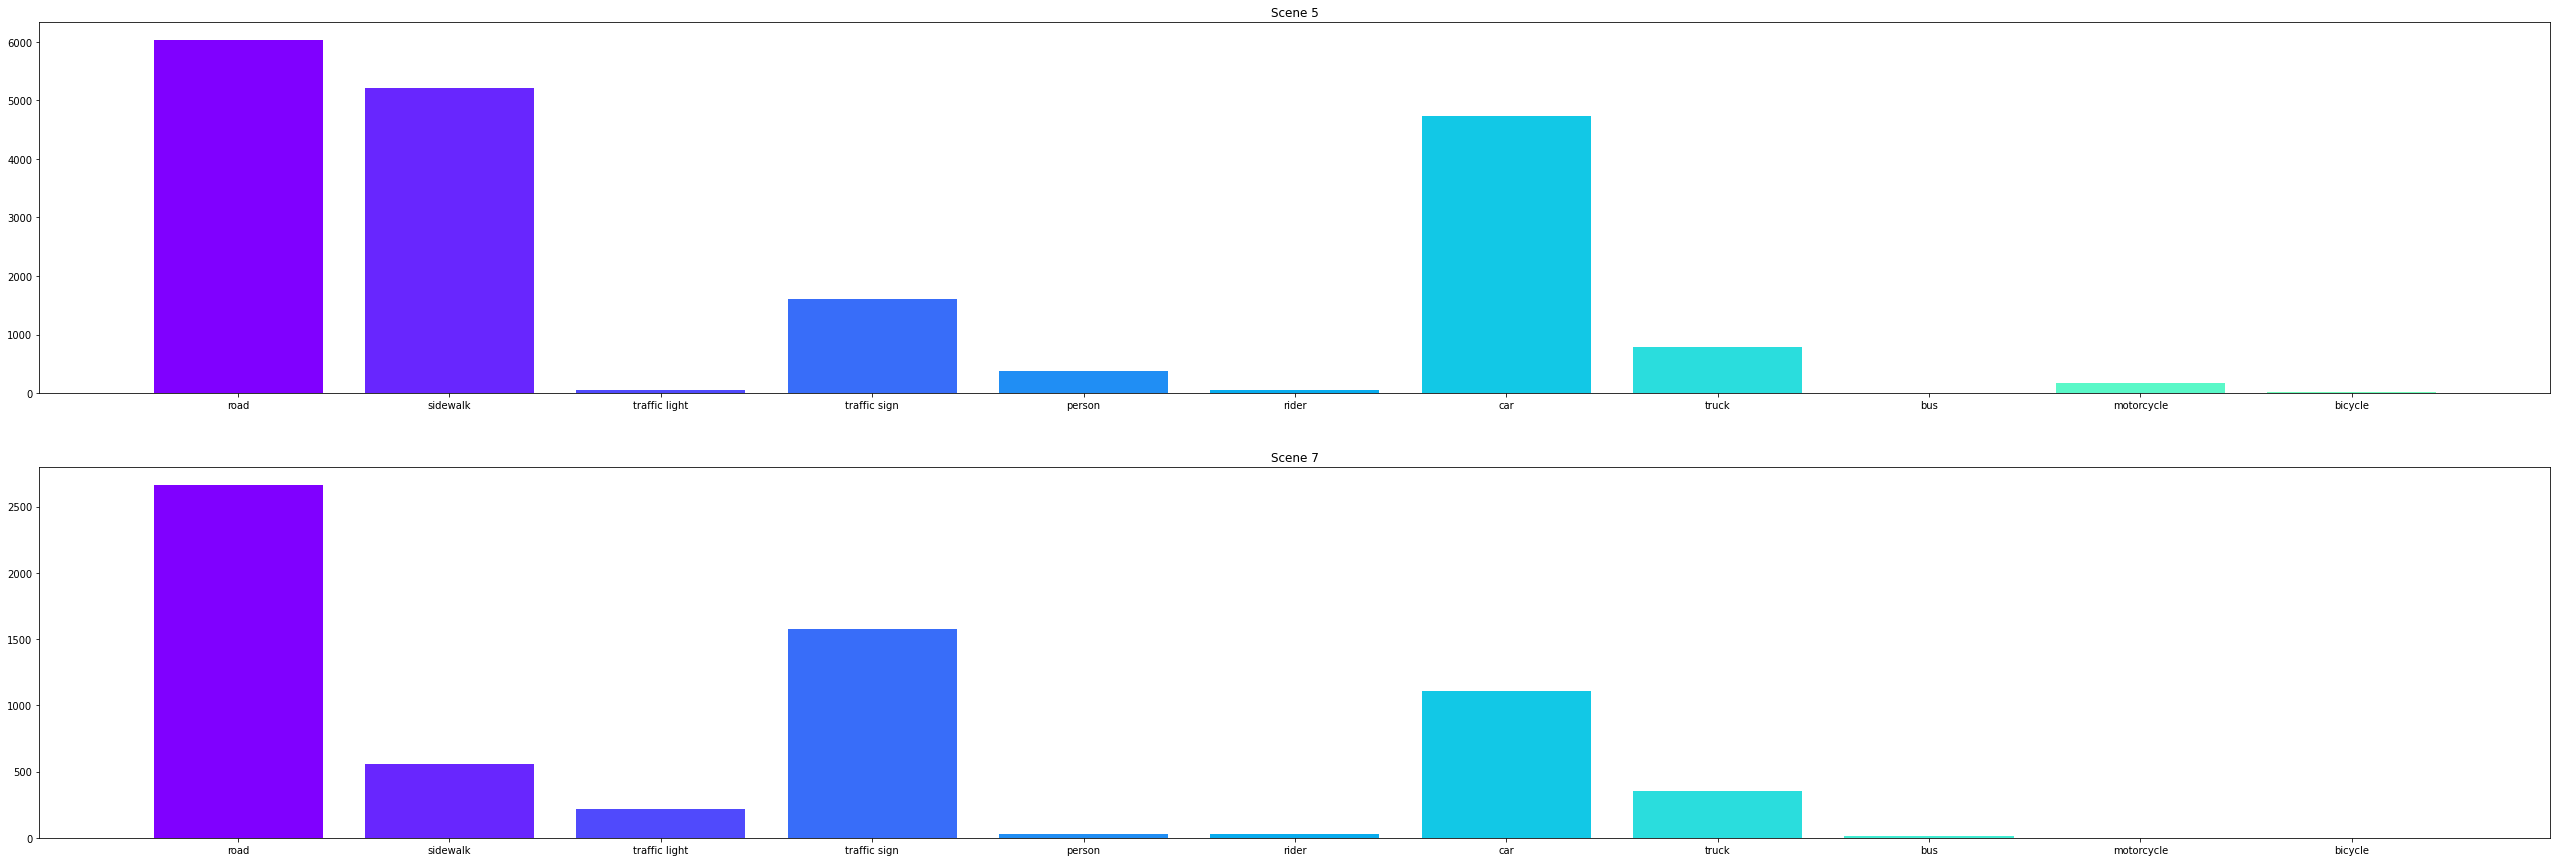

In [32]:
fig, axs = plt.subplots(2, figsize=(45,15))

axs[0].bar(labels, return_count_per_scene('2013_05_28_drive_0005_sync', total_per_scene), color=colors)
axs[0].set_title('Scene 5')
axs[1].bar(labels, return_count_per_scene('2013_05_28_drive_0007_sync', total_per_scene), color=colors)
axs[1].set_title('Scene 7')

Text(0.5, 1.0, 'Scene 4')

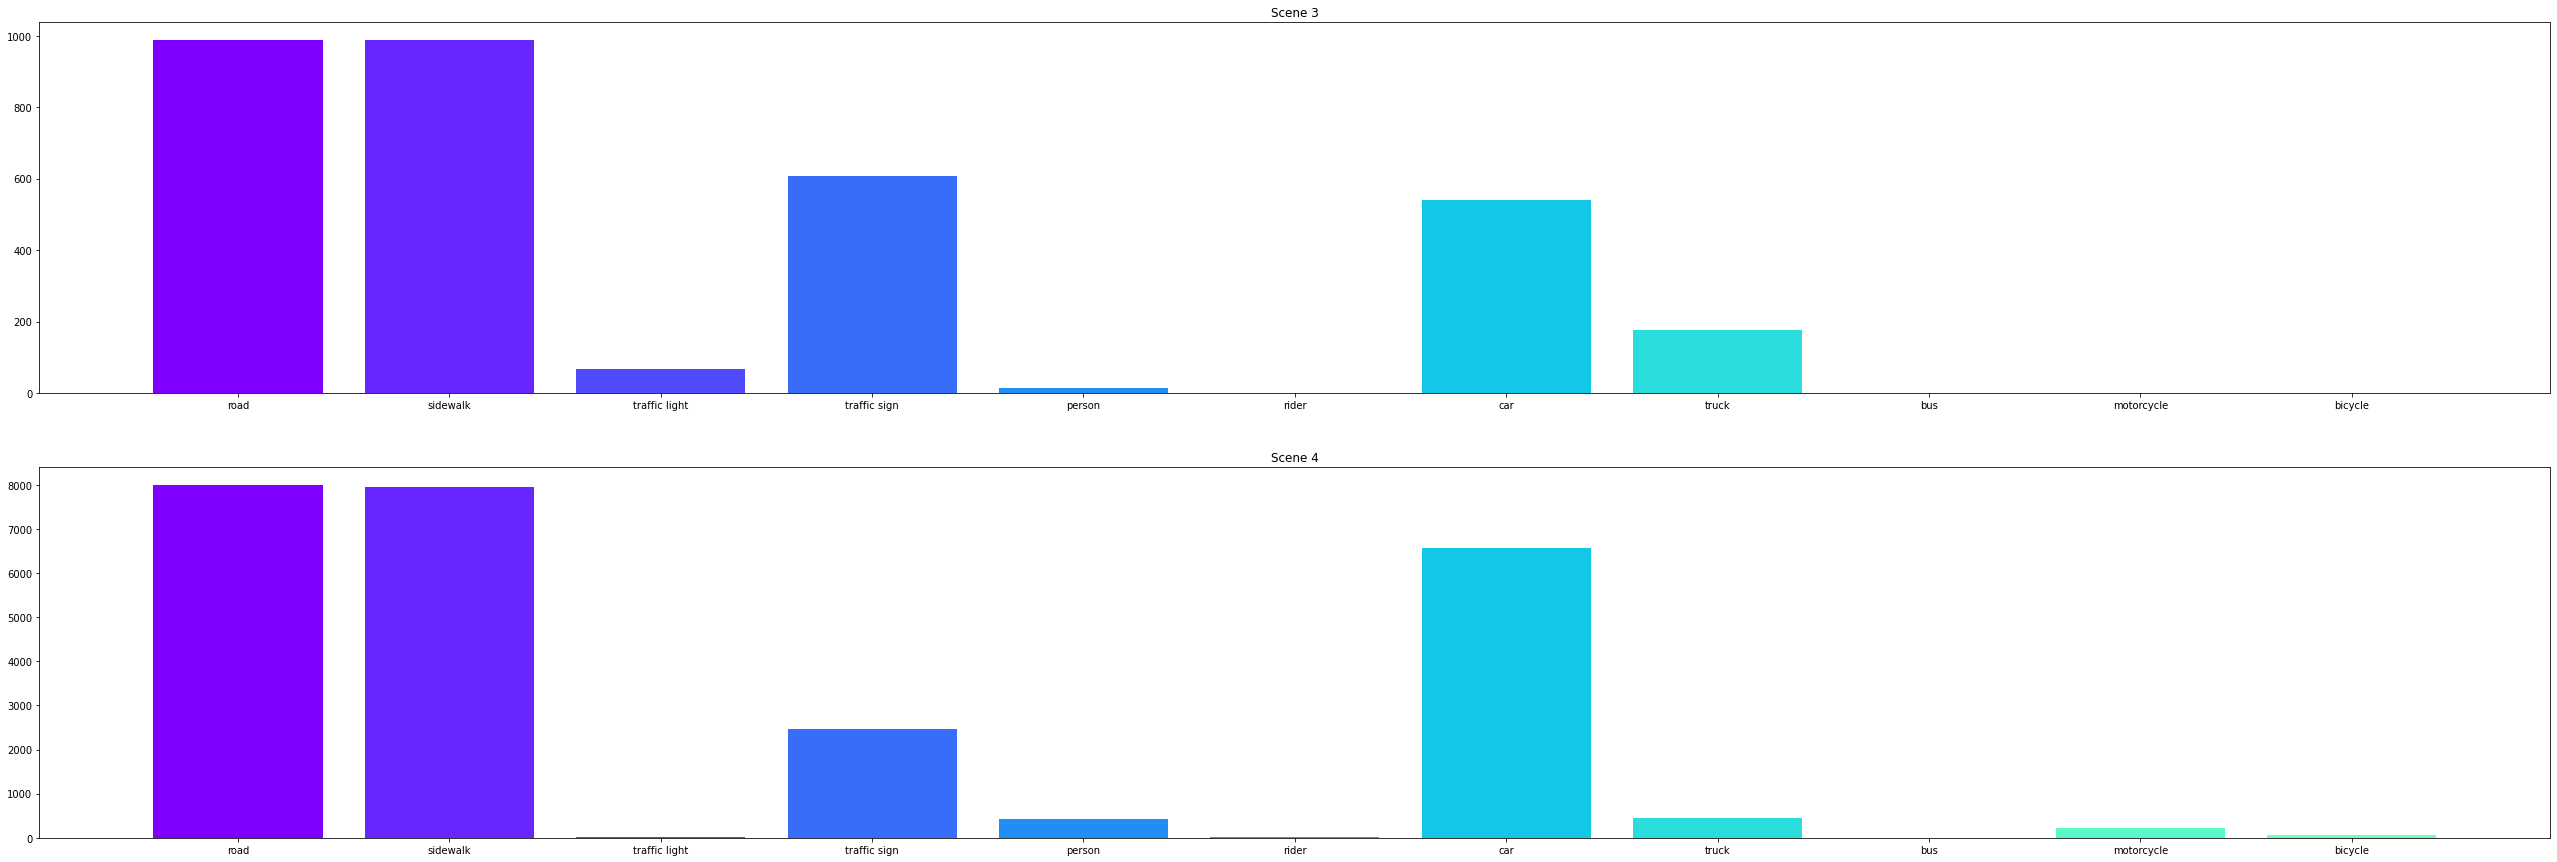

In [33]:
fig, axs = plt.subplots(2, figsize=(45,15))

axs[0].bar(labels, return_count_per_scene('2013_05_28_drive_0003_sync', total_per_scene), color=colors)
axs[0].set_title('Scene 3')
axs[1].bar(labels, return_count_per_scene('2013_05_28_drive_0004_sync', total_per_scene), color=colors)
axs[1].set_title('Scene 4')

In [73]:
tmp_props = props.drop([str(i) for i in list(set(priority_labels) ^ set(list(range(0,19))))], axis=1)
tmp_props = tmp_props.drop(['255'], axis=1)
tmp_props['sum'] = tmp_props.sum(axis=1, numeric_only=True)
tmp_props[(tmp_props["1"] == 1) & (tmp_props["13"] == 1) & (tmp_props['sum'] == 2)]

,image,scene,0,1,6,7,11,12,13,14,15,17,18,sum
6528,0000001017.png,/2013_05_28_drive_0000_sync,0,1,0,0,0,0,1,0,0,0,0,2
6539,0000001019.png,/2013_05_28_drive_0000_sync,0,1,0,0,0,0,1,0,0,0,0,2
6550,0000001021.png,/2013_05_28_drive_0000_sync,0,1,0,0,0,0,1,0,0,0,0,2
6561,0000001023.png,/2013_05_28_drive_0000_sync,0,1,0,0,0,0,1,0,0,0,0,2
6572,0000001025.png,/2013_05_28_drive_0000_sync,0,1,0,0,0,0,1,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57011,0000011366.png,/2013_05_28_drive_0002_sync,0,1,0,0,0,0,1,0,0,0,0,2
57016,0000011368.png,/2013_05_28_drive_0002_sync,0,1,0,0,0,0,1,0,0,0,0,2
57021,0000011370.png,/2013_05_28_drive_0002_sync,0,1,0,0,0,0,1,0,0,0,0,2
57026,0000011372.png,/2013_05_28_drive_0002_sync,0,1,0,0,0,0,1,0,0,0,0,2


In [69]:
#remove single class images
props_v1 = props
props_v1 = props_v1.drop([str(i) for i in list(set(priority_labels) ^ set(list(range(0,19))))], axis=1)
props_v1 = props_v1.drop(['255'], axis=1)
props_v1['sum'] = props_v1.sum(axis=1, numeric_only=True)


print("Initial size: ", props_v1.shape)
for i in priority_labels:
    props_v1 = props_v1.drop(props_v1[(props_v1[str(i)] == 1) & (props_v1['sum'] == 1)].index)
    print("After removing ", str(i), ": ", props_v1.shape)

props_v1.head()

Initial size:  (61390, 14)
After removing  0 :  (60006, 14)
After removing  1 :  (59955, 14)
After removing  6 :  (59955, 14)
After removing  7 :  (59955, 14)
After removing  11 :  (59955, 14)
After removing  12 :  (59955, 14)
After removing  13 :  (59939, 14)
After removing  14 :  (59939, 14)
After removing  15 :  (59939, 14)
After removing  17 :  (59939, 14)
After removing  18 :  (59939, 14)


,image,scene,0,1,6,7,11,12,13,14,15,17,18,sum
0,0000000002.png,/2013_05_28_drive_0007_sync,1,0,0,1,0,0,1,0,0,0,0,3
1,0000000003.png,/2013_05_28_drive_0007_sync,1,0,0,1,0,0,1,0,0,0,0,3
2,0000000004.png,/2013_05_28_drive_0003_sync,1,1,0,1,0,0,1,0,0,0,0,4
3,0000000004.png,/2013_05_28_drive_0007_sync,1,0,0,1,0,0,1,0,0,0,0,3
4,0000000005.png,/2013_05_28_drive_0007_sync,1,0,0,1,0,0,1,0,0,0,0,3


In [100]:
#remove dual class images of the most predominant
props_v2 = props_v1

print("Initial size: ", props_v2.shape)
props_v2 = props_v2.drop(props_v2[(props_v2["0"] == 1) & (props_v2["1"] == 1) & (props_v2['sum'] == 2)].index)
print("After removing (0,1): ", props_v2.shape)
props_v2 = props_v2.drop(props_v2[(props_v2["0"] == 1) & (props_v2["13"] == 1) & (props_v2['sum'] == 2)].index)
print("After removing (0,13): ", props_v2.shape)
props_v2 = props_v2.drop(props_v2[(props_v2["1"] == 1) & (props_v2["13"] == 1) & (props_v2['sum'] == 2)].index)
print("After removing (1,13): ", props_v2.shape)
props_v2 = props_v2.drop(props_v2[(props_v2["0"] == 1) & (props_v2["7"] == 1) & (props_v2['sum'] == 2)].index)
print("After removing (0,7): ", props_v2.shape)

props_v2.head()

Initial size:  (59939, 14)
After removing (0,1):  (55803, 14)
After removing (0,13):  (54668, 14)
After removing (1,13):  (54606, 14)
After removing (0,7):  (53986, 14)


,image,scene,0,1,6,7,11,12,13,14,15,17,18,sum
0,0000000002.png,/2013_05_28_drive_0007_sync,1,0,0,1,0,0,1,0,0,0,0,3
1,0000000003.png,/2013_05_28_drive_0007_sync,1,0,0,1,0,0,1,0,0,0,0,3
2,0000000004.png,/2013_05_28_drive_0003_sync,1,1,0,1,0,0,1,0,0,0,0,4
3,0000000004.png,/2013_05_28_drive_0007_sync,1,0,0,1,0,0,1,0,0,0,0,3
4,0000000005.png,/2013_05_28_drive_0007_sync,1,0,0,1,0,0,1,0,0,0,0,3


In [89]:
props_v2[props_v2['scene'] == '/2013_05_28_drive_0000_sync'].sum(axis=0)[-(len(priority_labels)+1):-1]

0     9799
1     9661
6      385
7     4123
11     775
12     854
13    9675
14    1466
15      28
17     884
18     707
dtype: object

Text(0.5, 1.0, 'Scene 10')

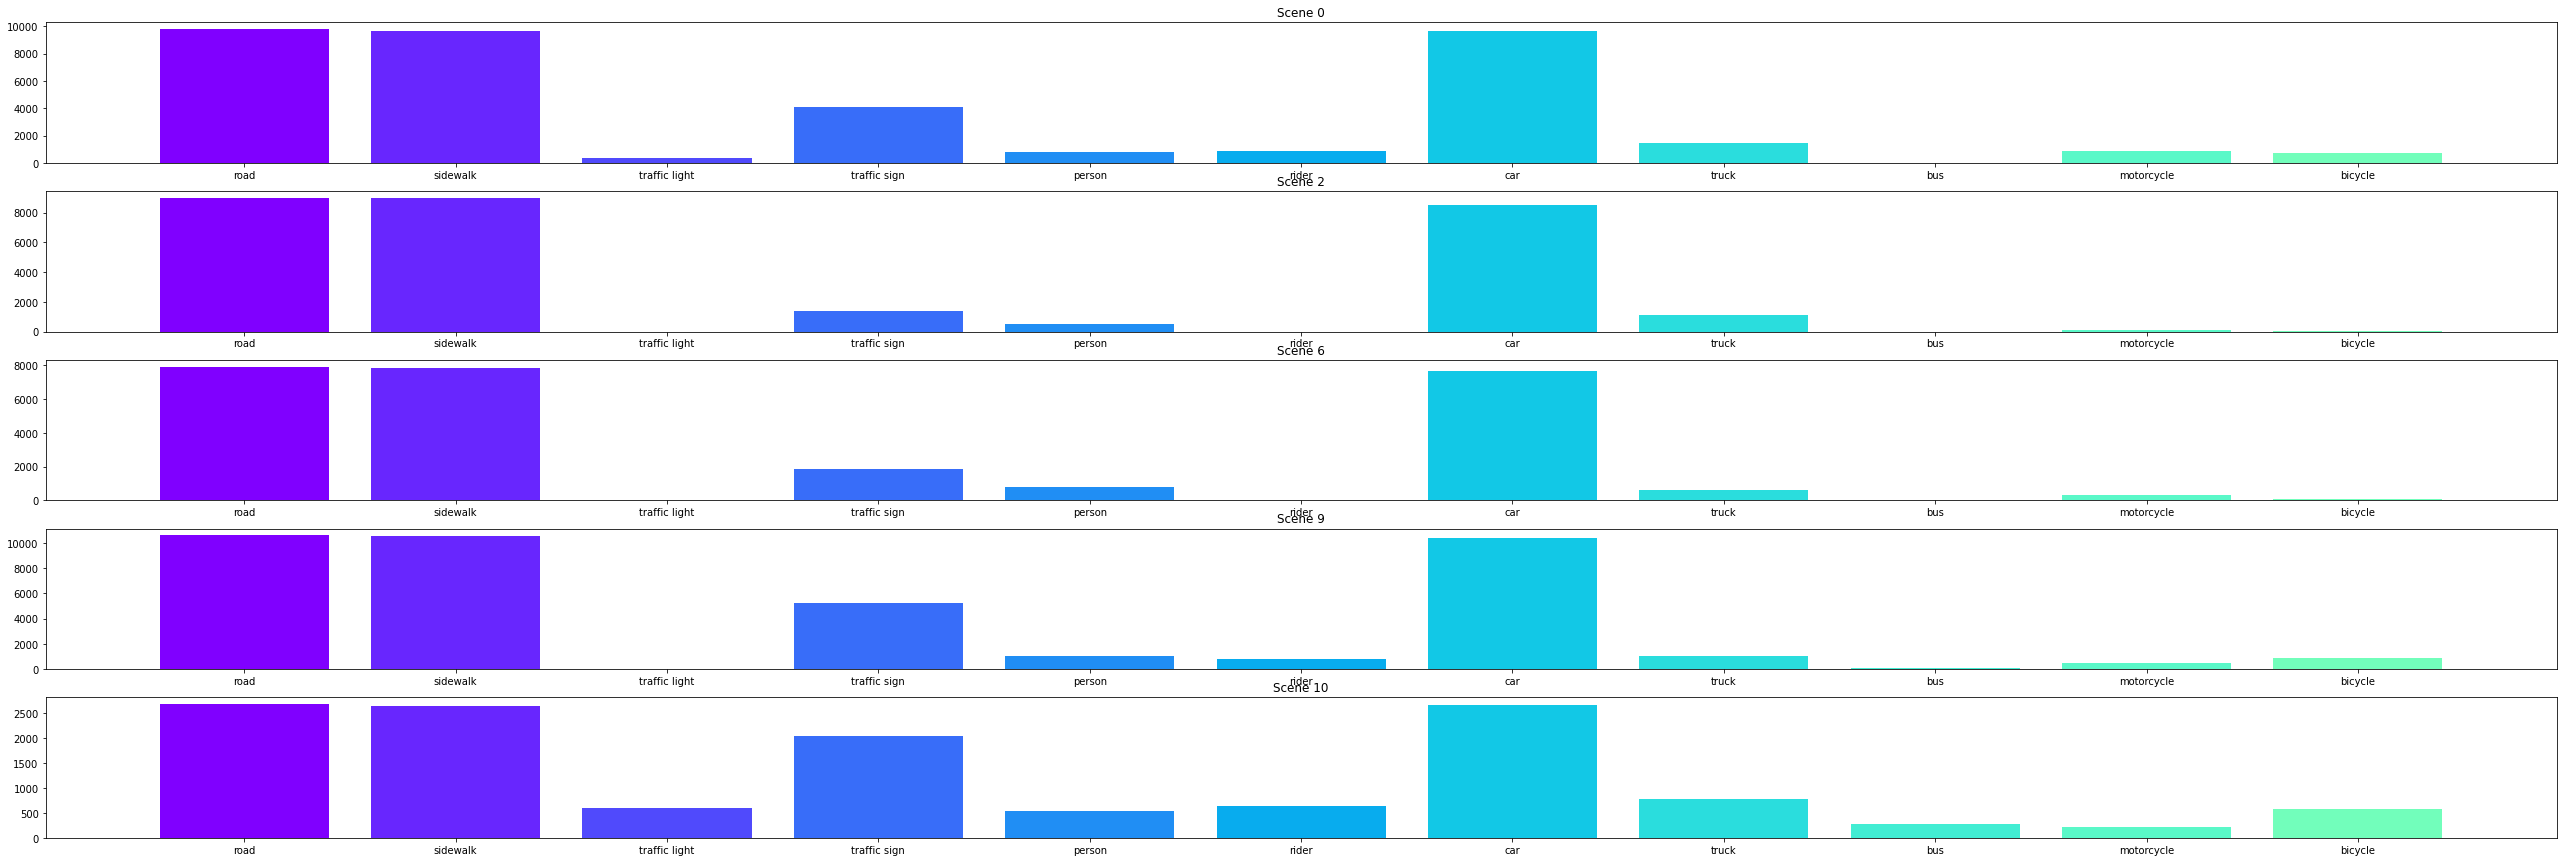

In [101]:
fig, axs = plt.subplots(5, figsize=(45,15))

axs[0].bar(labels, props_v2[props_v2['scene'] == '/2013_05_28_drive_0000_sync'].sum(axis=0)[-(len(priority_labels)+1):-1], color=colors)
axs[0].set_title('Scene 0')
axs[1].bar(labels, props_v2[props_v2['scene'] == '/2013_05_28_drive_0002_sync'].sum(axis=0)[-(len(priority_labels)+1):-1], color=colors)
axs[1].set_title('Scene 2')
axs[2].bar(labels, props_v2[props_v2['scene'] == '/2013_05_28_drive_0006_sync'].sum(axis=0)[-(len(priority_labels)+1):-1], color=colors)
axs[2].set_title('Scene 6')
axs[3].bar(labels, props_v2[props_v2['scene'] == '/2013_05_28_drive_0009_sync'].sum(axis=0)[-(len(priority_labels)+1):-1], color=colors)
axs[3].set_title('Scene 9')
axs[4].bar(labels, props_v2[props_v2['scene'] == '/2013_05_28_drive_0010_sync'].sum(axis=0)[-(len(priority_labels)+1):-1], color=colors)
axs[4].set_title('Scene 10')

Text(0.5, 1.0, 'Scene 7')

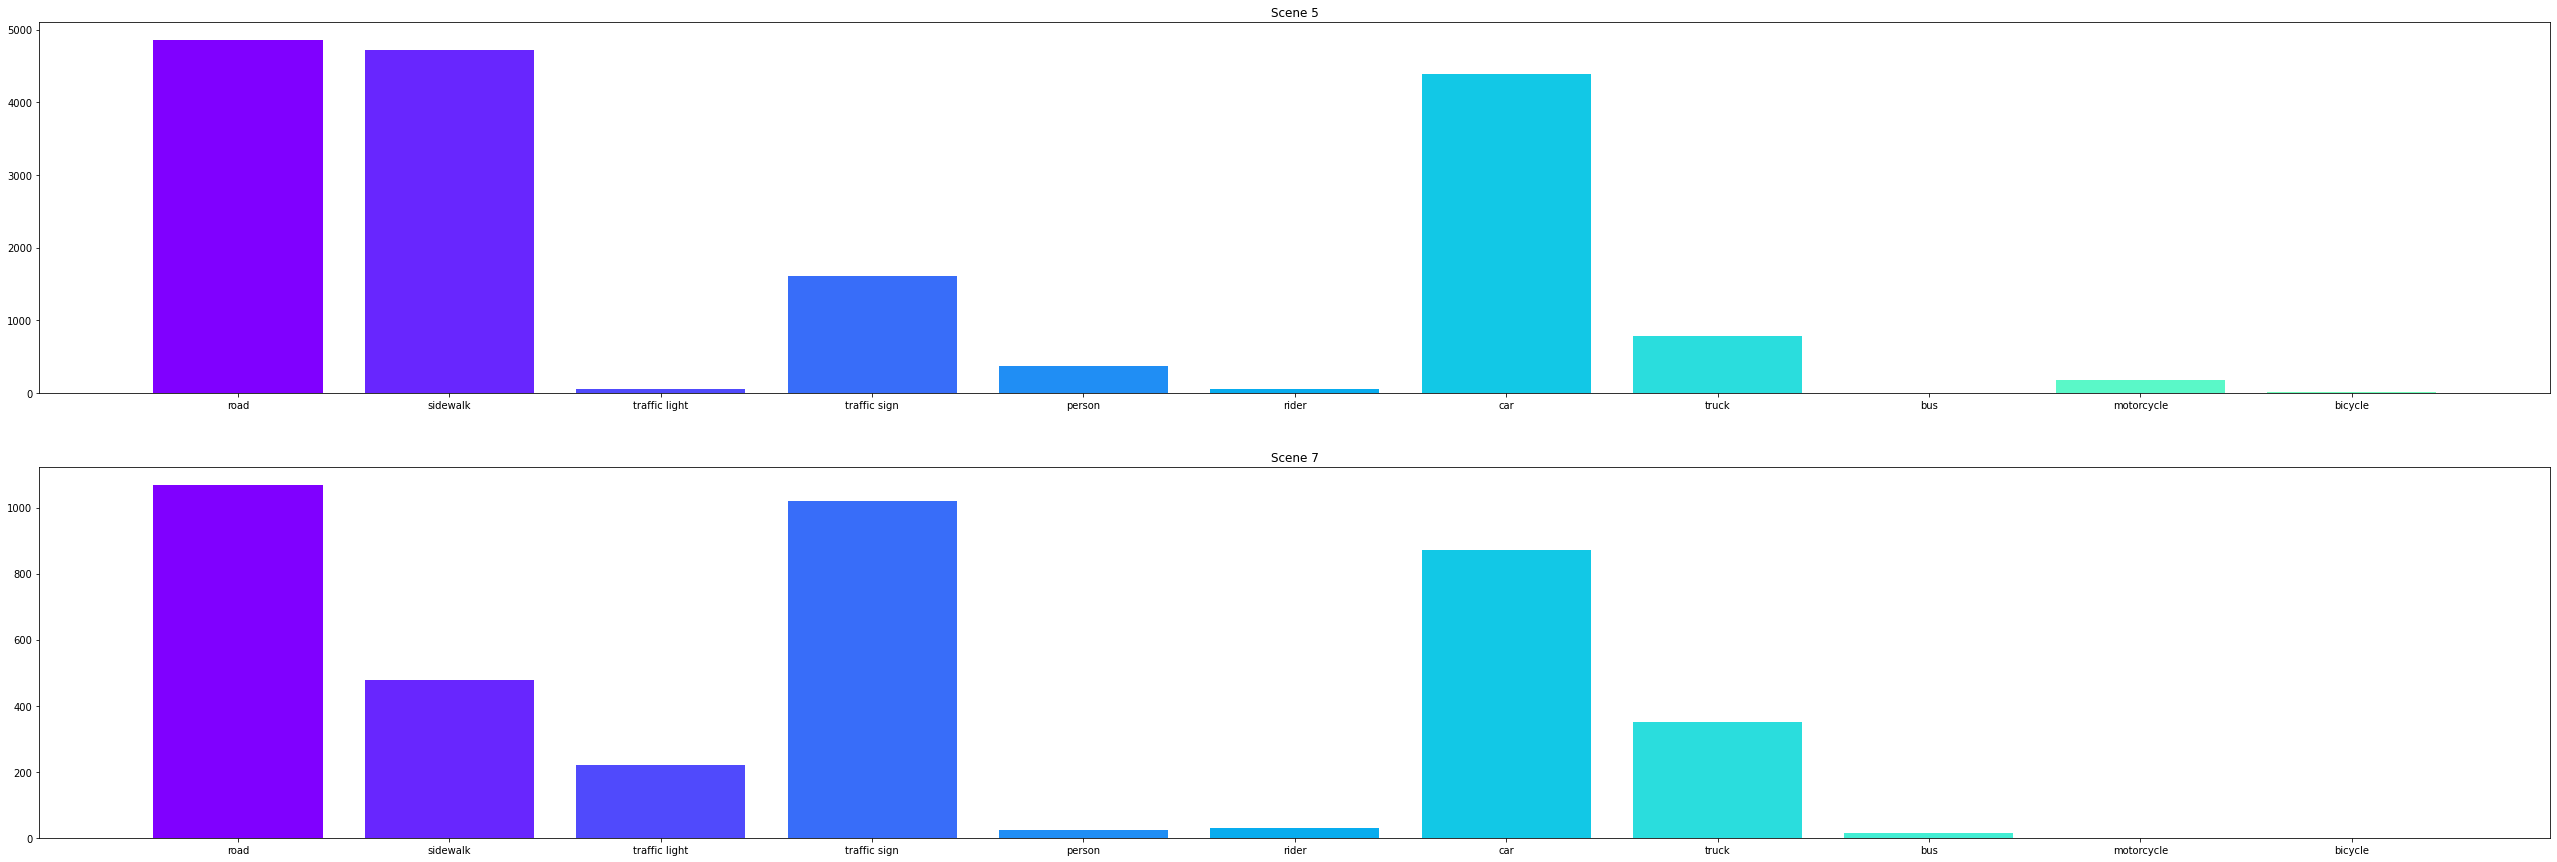

In [102]:
fig, axs = plt.subplots(2, figsize=(45,15))

axs[0].bar(labels, props_v2[props_v2['scene'] == '/2013_05_28_drive_0005_sync'].sum(axis=0)[-(len(priority_labels)+1):-1], color=colors)
axs[0].set_title('Scene 5')
axs[1].bar(labels, props_v2[props_v2['scene'] == '/2013_05_28_drive_0007_sync'].sum(axis=0)[-(len(priority_labels)+1):-1], color=colors)
axs[1].set_title('Scene 7')

Text(0.5, 1.0, 'Scene 4')

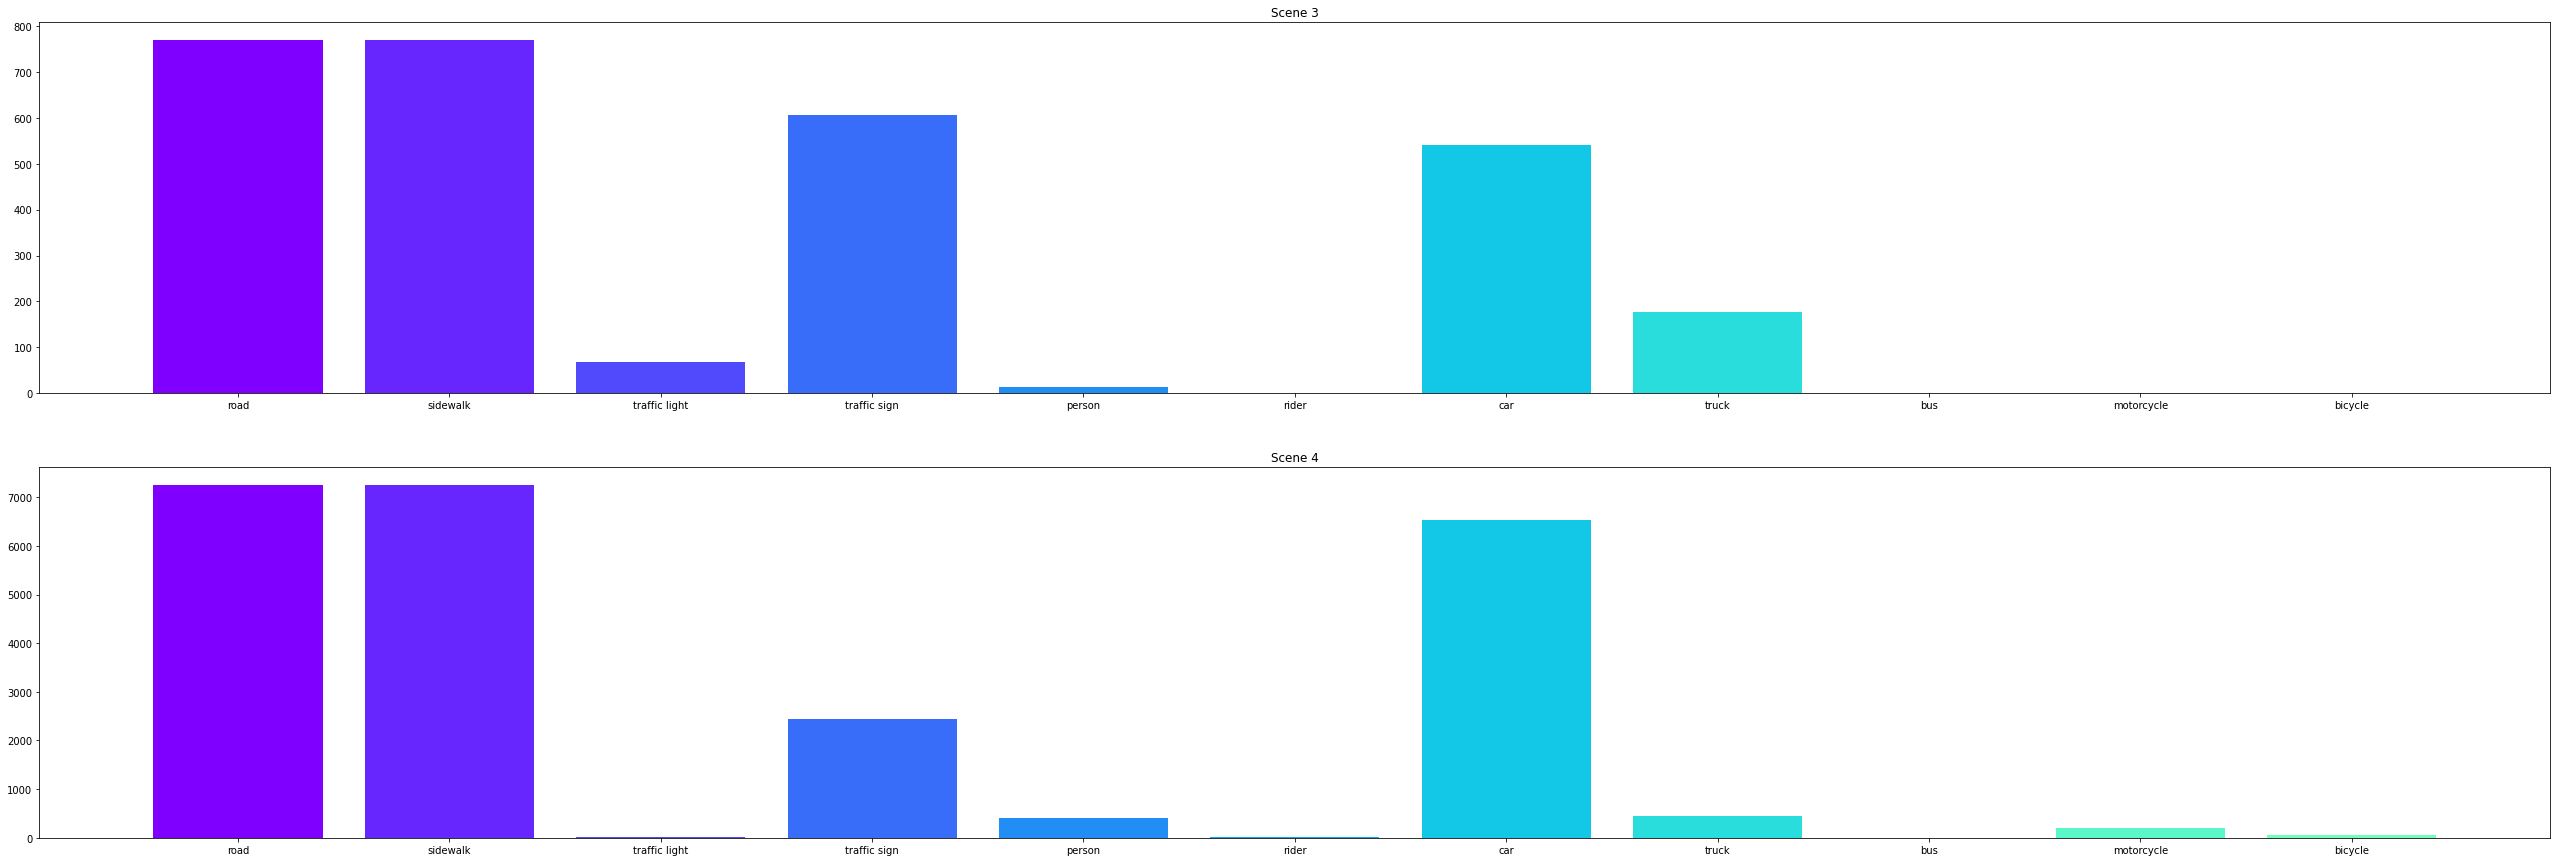

In [103]:
fig, axs = plt.subplots(2, figsize=(45,15))

axs[0].bar(labels, props_v2[props_v2['scene'] == '/2013_05_28_drive_0003_sync'].sum(axis=0)[-(len(priority_labels)+1):-1], color=colors)
axs[0].set_title('Scene 3')
axs[1].bar(labels, props_v2[props_v2['scene'] == '/2013_05_28_drive_0004_sync'].sum(axis=0)[-(len(priority_labels)+1):-1], color=colors)
axs[1].set_title('Scene 4')

In [104]:
props_v2.to_csv('../kitti360_reduced_by_extra_classes.csv')

In [135]:
props_v2 = pd.read_csv('../kitti360_reduced_by_extra_classes.csv')

In [136]:
props_v2 = props_v2.rename(columns={"scene": "scene_name"})
props_v2['scene'] = props_v2['scene_name'].apply(lambda x: int(re.findall('\d{4}', str(x))[1]))
props_v2.head()

,Unnamed: 0,image,scene_name,0,1,6,7,11,12,13,14,15,17,18,sum,scene
0,0,0000000002.png,/2013_05_28_drive_0007_sync,1,0,0,1,0,0,1,0,0,0,0,3,7
1,1,0000000003.png,/2013_05_28_drive_0007_sync,1,0,0,1,0,0,1,0,0,0,0,3,7
2,2,0000000004.png,/2013_05_28_drive_0003_sync,1,1,0,1,0,0,1,0,0,0,0,4,3
3,3,0000000004.png,/2013_05_28_drive_0007_sync,1,0,0,1,0,0,1,0,0,0,0,3,7
4,4,0000000005.png,/2013_05_28_drive_0007_sync,1,0,0,1,0,0,1,0,0,0,0,3,7


In [ ]:
# Results collection

In [12]:
t = [1,2,3]
tt = [4,5,6]

[x + y for x, y in zip(t, tt)]

[5, 7, 9]

In [18]:
import json

def calculate_results_model(folder):
    f = open(folder + 'metrics.json')
    data = json.load(f)
    
    s_0 = list(data['scene3']['specific']['iou_per_class'].values())
    s_1 = list(data['scene4']['specific']['iou_per_class'].values())
    
    mean_list = [(x + y) / 2 for x, y in zip(s_0, s_1)]
    
    print("== Priority labels ==")
    mean = 0
    for i in range(0,len(mean_list)):
        mean += mean_list[i]
        print(i, ': ', mean_list[i])
    print('Mean IOU: ', mean / len(mean_list))
    print('Mean IOU2: ', (data['scene3']['specific']['mIOU'] + data['scene4']['specific']['mIOU']) / 2)
    print('Mean Acc: ', (data['scene3']['specific']['acc'] + data['scene4']['specific']['acc']) / 2)
    
    print("== Non Priority labels ==")
    
    s_0 = list(data['scene3']['standard']['iou_per_class'].values())
    s_1 = list(data['scene4']['standard']['iou_per_class'].values())
    mean_list = [(x + y) / 2 for x, y in zip(s_0, s_1)]
    mean = 0
    for i in range(len(mean_list)):
        mean += mean_list[i]
        print(i, ': ', mean_list[i])
    print('Mean IOU: ', mean / len(mean_list))
    print('Mean IOU2: ', (data['scene3']['standard']['mIOU'] + data['scene4']['standard']['mIOU']) / 2)
    print('Mean Acc: ', (data['scene3']['standard']['acc'] + data['scene4']['standard']['acc']) / 2)
calculate_results_model('../new_evaluation_v2/xception_retrained_freezed_375_00001_infinite_crf/')

== Priority labels ==
0 :  0.8975586880731643
1 :  0.7039684263321699
2 :  0.0
3 :  0.061960787639742464
4 :  0.1026566649126886
5 :  0.0017861992346623874
6 :  0.7877428631013554
7 :  0.09018117531679871
8 :  0.00020322237738916565
Mean IOU:  0.2940064474431079
Mean IOU2:  0.29500000000000004
Mean Acc:  0.91
== Non Priority labels ==
0 :  0.8275414049009404
1 :  0.610795867566894
2 :  0.6379920062254333
3 :  0.4471891897872309
4 :  0.2117804358603158
5 :  0.04110114002537398
6 :  0.0
7 :  0.027902656826704602
8 :  0.5717498556163589
9 :  0.41971295115683166
10 :  0.5981265120095508
11 :  0.013614285181055874
12 :  0.0001953937839660428
13 :  0.16529378907283937
14 :  0.12462518437765757
15 :  0.0
16 :  0.0
17 :  0.016875054330503316
18 :  2.1128496472714893e-05
Mean IOU:  0.24813246606411204
Mean IOU2:  0.25
Mean Acc:  0.73
